<a href="https://colab.research.google.com/github/neethu2001/ANPR/blob/main/statics2_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#outliers

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
#define our dataset
dataset=[11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

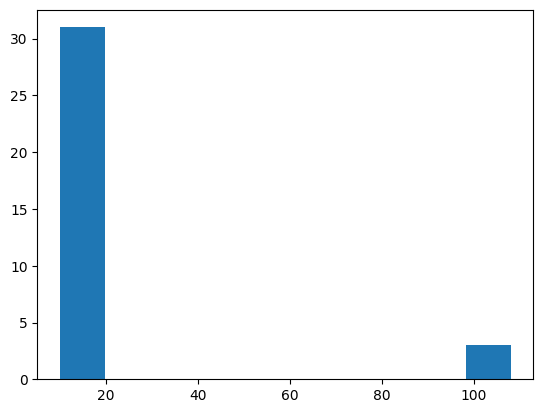

In [23]:
plt.hist(dataset)

In [24]:
#calculating the z score
outliers=[]

def detect_outliers(data):
    threshold=3 #threshold defines the values after standard deviation 3(Q3\s)
    mean=np.mean(data)
    std=np.std(data)

    for i in data:
      z_score= (i-mean)/std
      if np.abs(z_score)>threshold:
          outliers.append(i)

    return outliers

In [25]:
detect_outliers(dataset)

[102, 107, 108]

In [26]:
#IQR=Q3-Q1
#sort the data
#calculate q1,q3
#iqr=q3-q1
#find lower fence= q1-1.5(iqr)
#find uper fence=q3+1.5(iqr)

In [28]:
dataset=sorted(dataset)
dataset

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [29]:
q1,q3=np.percentile(dataset,[25,75])
print(q1,q3)

12.0 15.0


In [30]:
iqr=q3-q1
print(iqr)

3.0


In [31]:
#find the lowefence
lowerfence=q1-(1.5*iqr)
higherfence=(q3+1.5*iqr)
print(lowerfence,higherfence)

7.5 19.5


<Axes: >

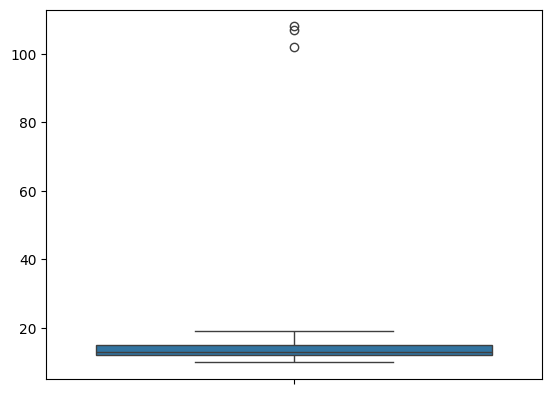

In [32]:
import seaborn as sns
sns.boxplot(dataset)

In [33]:
filtered_dataset = [x for x in dataset if x >= lowerfence and x <= higherfence]
print("Filtered Dataset:", filtered_dataset)

Filtered Dataset: [10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 17, 19]
